<a href="https://colab.research.google.com/github/Swarn36/Classification_data_analysis/blob/main/App_User_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#App User Segmentation

We must divide up users into groups according to how they interact with the app in order to solve the segmentation problem. Thus, in order to address this issue, we require user engagement data from the app.

I came across a dataset that included information on how users who uninstalled an app and those who use it frequently interacted with it. To identify the retained and churn users, this data can be used to group users. The dataset is available for download [here](https://statso.io/app-users-segmentation-case-study/).

Below is the column information about the dataset that I’ll be using here:

    1. userid: The identity number of the user;
    2. Average Screen Time: The average screen time of the user on the application;
    3. Average Spent on App (INR): The average amount spent by the user on the application;
    4. Left Review: Did the user leave any reviews about the experience on the application? (1 if true, otherwise 0)
    5. Ratings: Ratings given by the user to the application;
    6. New Password Request: The number of times the user requested a new password;
    7. Last Visited Minutes: Minuted passed by when the user was last active;
    8. Status: Installed if the application is installed and uninstalled if the user has deleted the application;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('/content/userbehaviour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


No missing value is detected here.

In [46]:
df['Last Visited Minutes'] = df['Last Visited Minutes'].astype('float')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   userid                         999 non-null    int64  
 1   Average Screen Time            999 non-null    float64
 2   Average Spent on App (INR)     999 non-null    float64
 3   Left Review                    999 non-null    int64  
 4   Ratings                        999 non-null    int64  
 5   New Password Request           999 non-null    int64  
 6   Last Visited Minutes           999 non-null    float64
 7   Status                         999 non-null    object 
 8   Spending-to-Screen-Time Ratio  999 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 70.4+ KB


In [3]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
0,1001,17.0,634.0,1,9,7,2990,Installed
1,1002,0.0,54.0,0,4,8,24008,Uninstalled
2,1003,37.0,207.0,0,8,5,971,Installed
3,1004,32.0,445.0,1,6,2,799,Installed
4,1005,45.0,427.0,1,5,6,3668,Installed


Let's see the summary statistics of this dataset

In [4]:
df.describe(include='all')

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Installed
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,916
mean,1500.000000,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899,NaN
std,288.530761,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516,NaN
min,1001.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,NaN
25%,1250.500000,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000,NaN
50%,1500.000000,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000,NaN
75%,1749.500000,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000,NaN


Let's see if we find any outliers in this dataset

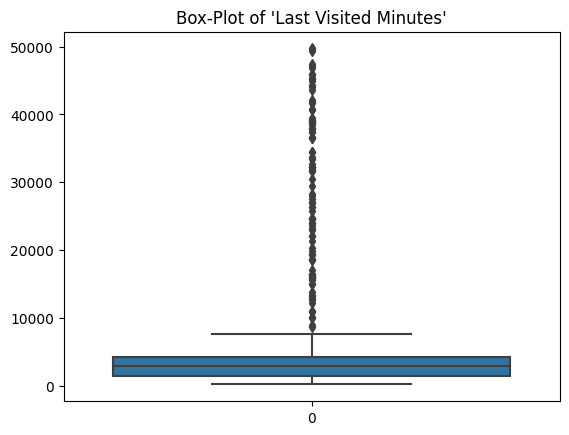

In [6]:
sns.boxplot(df['Last Visited Minutes'])
plt.title('Box-Plot of \'Last Visited Minutes\'');

It seems this column has outliers over the range but all the numbers above 75% range is in an order

In [8]:
df['Average Screen Time'].mean().round(3)

24.39

In [10]:
df['Spending-to-Screen-Time Ratio'] = df['Average Spent on App (INR)'] / df['Average Screen Time']
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Spending-to-Screen-Time Ratio
0,1001,17.0,634.0,1,9,7,2990,Installed,37.294118
1,1002,0.0,54.0,0,4,8,24008,Uninstalled,inf
2,1003,37.0,207.0,0,8,5,971,Installed,5.594595
3,1004,32.0,445.0,1,6,2,799,Installed,13.906250
4,1005,45.0,427.0,1,5,6,3668,Installed,9.488889


Filter the dataset to include only users who have left a review (Left Review = 1) and have given a rating of 4 or higher. How many such users are there?

In [11]:
mask_a = df['Left Review'] == 1
mask_b = df['Ratings'] >= 4

df_lr = df[mask_a & mask_b]
df_lr.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Spending-to-Screen-Time Ratio
0,1001,17.0,634.0,1,9,7,2990,Installed,37.294118
3,1004,32.0,445.0,1,6,2,799,Installed,13.906250
4,1005,45.0,427.0,1,5,6,3668,Installed,9.488889
6,1007,49.0,887.0,1,9,6,4481,Installed,18.102041
8,1009,28.0,741.0,1,8,2,801,Installed,26.464286


In [12]:
num_users = df_lr.shape[0]
print(f"Number of users who left a review with a rating of 4 or higher: {num_users}")

Number of users who left a review with a rating of 4 or higher: 421


Calculate the correlation between “Ratings” and “Average Spent on App (INR)” for the dataset. What does this correlation tell us about user behaviour?

In [13]:
corr = df['Ratings'].corr(df['Average Spent on App (INR)'])
corr

0.4824513320174747

Moderate positive linear relationship between these two variables

Let's make a heatmap for the numerical columns

In [18]:
df.select_dtypes('number').nunique()

userid                           999
Average Screen Time               51
Average Spent on App (INR)       606
Left Review                        2
Ratings                           11
New Password Request              15
Last Visited Minutes             938
Spending-to-Screen-Time Ratio    882
dtype: int64

In [19]:
df.columns

Index(['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes', 'Status', 'Spending-to-Screen-Time Ratio'],
      dtype='object')

<Axes: >

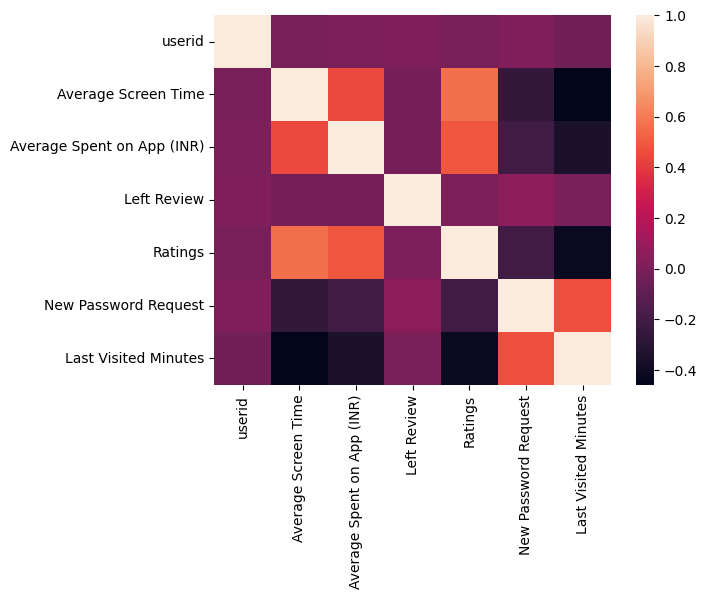

In [20]:
corr_all = df[['userid', 'Average Screen Time', 'Average Spent on App (INR)',
       'Left Review', 'Ratings', 'New Password Request',
       'Last Visited Minutes']].corr()

sns.heatmap(corr_all)

It can be seen that there is no multicollinearity found among the numerical variables.

Split the dataset into two subsets: one for users who have “Status” as Installed and another for users who have “Status” as Uninstalled. What are the average screen time and average spent on the app for each group?

In [26]:
installed_users = df[df['Status'] == 'Installed']
uninstalled_users = df[df['Status'] == 'Uninstalled']

In [27]:
installed_users.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Spending-to-Screen-Time Ratio
0,1001,17.0,634.0,1,9,7,2990,Installed,37.294118
2,1003,37.0,207.0,0,8,5,971,Installed,5.594595
3,1004,32.0,445.0,1,6,2,799,Installed,13.906250
4,1005,45.0,427.0,1,5,6,3668,Installed,9.488889
5,1006,28.0,599.0,0,9,4,2878,Installed,21.392857


In [29]:
avg_ins = installed_users['Average Screen Time'].mean().round(2)
print(f'Average screen time for installed users: {avg_ins}')

Average screen time for installed users: 26.39


In [30]:
avg_unins = uninstalled_users['Average Screen Time'].mean().round(2)
print(f'Average screen time for installed users: {avg_unins}')

Average screen time for installed users: 2.28


Let's see the portion of customer installed the apps

In [31]:
df['Status'].value_counts(normalize=True)

Installed      0.916917
Uninstalled    0.083083
Name: Status, dtype: float64

In [33]:
fig = px.bar(
              df['Status'].value_counts(normalize=True),
              x = df['Status'].value_counts(normalize=True).index,
              y = df['Status'].value_counts(normalize=True),
              title = 'Proportion of the Status'
)

fig.update_layout(xaxis_title='Status', yaxis_title='Frequency')
fig.show();1

If `Status` is the target variable in this dataset and being this problem a classification problem one can solve this by modelling through balancing the dataset and the call standardscaler transformation with Gradient Boosting Classifier or Random Forest Classification by utilizing the Confusion Matrix

In [34]:
figure = px.scatter(data_frame = df,
                    x="Average Screen Time",
                    y="Average Spent on App (INR)",
                    size="Average Spent on App (INR)",
                    color= "Status",
                    title = "Relationship Between Spending Capacity and Screentime",
                    trendline="ols")
figure.show();

We can see that how imbalanced is the dataset regarding the Status column

#Random Forest Classification


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import (
                            ConfusionMatrixDisplay, # (.from_estimator, .from_predictions)
                            classification_report,
                            confusion_matrix,
                            accuracy_score,
                            )

In [39]:
df['Status'].value_counts()

Installed      916
Uninstalled     83
Name: Status, dtype: int64

In [38]:
baseline_acc = df['Status'].value_counts(normalize=True).max()

print(f'Baseline accuracy: {baseline_acc}')

Baseline accuracy: 0.9169169169169169


In [70]:
target = 'Status'

X = df.drop(columns=[target, 'userid', 'Spending-to-Screen-Time Ratio'])
y=df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (999, 6)
y shape: (999,)


In [71]:
for i in X.columns:
    MinMaxScaler(i)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (799, 6)
y_train shape: (799,)
X_test shape: (200, 6)
y_test shape: (200,)


In [73]:
# first to do the over sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (1458, 6)


,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
0,21.0,892.0,0,7,7,4942.0
1,30.0,416.0,0,5,4,2998.0
2,29.0,91.0,1,7,8,3241.0
3,22.0,706.0,0,9,4,4851.0
4,16.0,767.0,1,8,5,2602.0


In [74]:
# first to do the under sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

print("X_train_under shape:", X_train_under.shape)
X_train_under.head()

X_train_under shape: (140, 6)


,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
0,19.0,354.0,1,7,6,3008.0
1,14.0,797.0,1,6,6,4591.0
2,50.0,360.0,1,7,2,479.0
3,15.0,841.0,0,5,3,289.0
4,7.0,19.0,1,1,1,4092.0


In [75]:
# fit the model
model_reg = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=42))
model_reg.fit(X_train, y_train)

model_over = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=42))
model_over.fit(X_train_over, y_train_over)

model_under = make_pipeline(MinMaxScaler(), RandomForestClassifier(random_state=42))
model_under.fit(X_train_under, y_train_under)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [76]:
model = [model_reg, model_over, model_under]

for m in model:
  acc_train = m.score(X_train, y_train)
  acc_test = m.score(X_test, y_test)

  print(f'Training Accuracy: {round(acc_train, 4)}')
  print(f'Test Accuracy: {round(acc_test, 4)}')

Training Accuracy: 1.0
Test Accuracy: 1.0
Training Accuracy: 1.0
Test Accuracy: 1.0
Training Accuracy: 0.9912
Test Accuracy: 0.99


In [79]:
model_over.named_steps

{'minmaxscaler': MinMaxScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42)}

In [81]:
params = {
    'randomforestclassifier__max_depth' : range(10,50,10),
    'randomforestclassifier__n_estimators' : range(25, 100, 25)
}

In [83]:
model_rf1 = GridSearchCV(
    model_over,
    param_grid=params,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [84]:
# Train model
model_rf1.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25)},
             verbose=1)

In [85]:
model_rf1.best_params_

{'randomforestclassifier__max_depth': 10,
 'randomforestclassifier__n_estimators': 25}

In [86]:
acc_train = model_rf1.score(X_train, y_train)
acc_test = model_rf1.score(X_test, y_test)

print("Training Accuracy:", round(acc_train, 2))
print("Testing Accuracy:", round(acc_test, 2))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [87]:
# Print classification report
print(classification_report(y_test, model_rf1.predict(X_test)))

              precision    recall  f1-score   support

   Installed       1.00      1.00      1.00       187
 Uninstalled       1.00      1.00      1.00        13

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



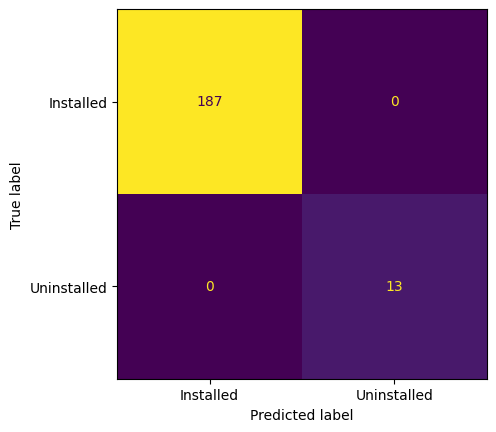

In [88]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(model_rf1, X_test, y_test, colorbar=False);

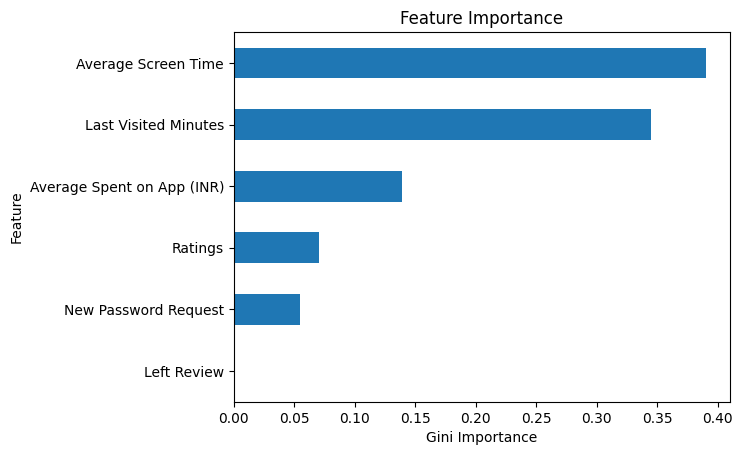

In [89]:
# Get feature names from training data
features = X_test.columns
# Extract importances from model
importances = model_rf1.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=features).sort_values()
# Plot 10 most important features
feat_imp.tail(10).plot(kind='barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

We can see that most important factor in this dataset is `Average Screen Time`

Let's cluster this dataset

#KMeans Cluster & PCA

In [95]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import trimmed_var

In [94]:
top_var = X.var().sort_values()

print("top_var shape:", top_var.shape)
top_var

top_var shape: (6,)


Left Review                   2.502442e-01
Ratings                       7.298164e+00
New Password Request          7.754141e+00
Average Screen Time           2.026470e+02
Average Spent on App (INR)    9.757233e+04
Last Visited Minutes          7.382309e+07
dtype: float64

In [96]:
fig = px.bar(
            top_var,
            x = top_var,
            y= top_var.index,
            title="SCF: High Variance Features"
)

fig.update_layout(xaxis_title = 'Variance', yaxis_title='Feature')
fig.show();

As `Last Visited Minutes` contains too large variance here we need to trim it down

In [97]:
top_trim_var = X.apply(trimmed_var, limits=(0.1, 0.1)).sort_values()

In [98]:
# Create horizontal bar chart of `top_ten_trim_var`
fig = px.bar(
            x = top_trim_var,
            y= top_trim_var.index,
            title="SCF: High Variance Features"
)

fig.update_layout(xaxis_title = 'Trimmed Variance', yaxis_title='Feature')

fig.show()

`From 73 million to 2 million`--- shrinken the data for that columns


In [116]:
high_var_cols = top_trim_var.index.to_list()

print("high_var_cols len:", len(top_trim_var))
high_var_cols

high_var_cols len: 6


['Left Review',
 'Ratings',
 'New Password Request',
 'Average Screen Time',
 'Average Spent on App (INR)',
 'Last Visited Minutes']

In [117]:
X = df[high_var_cols]

print("X type:", type(X))
print("X shape:", X.shape)
X.head()

X type: <class 'pandas.core.frame.DataFrame'>
X shape: (999, 6)


,Left Review,Ratings,New Password Request,Average Screen Time,Average Spent on App (INR),Last Visited Minutes
0,1,9,7,17.0,634.0,2990.0
1,0,4,8,0.0,54.0,24008.0
2,0,8,5,37.0,207.0,971.0
3,1,6,2,32.0,445.0,799.0
4,1,5,6,45.0,427.0,3668.0


In [101]:
X_summary = X.aggregate(['mean','std']).astype(int)
X_summary

,Left Review,Ratings,New Password Request,Average Screen Time,Average Spent on App (INR),Last Visited Minutes
mean,0,6,4,24,424,5110
std,0,2,2,14,312,8592


In [102]:
model_1 = make_pipeline(MinMaxScaler(), KMeans(n_clusters=3, random_state=42))
model_1.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [103]:
model_1.named_steps

{'minmaxscaler': MinMaxScaler(),
 'kmeans': KMeans(n_clusters=3, random_state=42)}

In [105]:
n_clusters = range(2, 13)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for n in n_clusters:
    # build a model with pipeline
    model = make_pipeline(MinMaxScaler(), KMeans(n_clusters=n, random_state=42))
    # Train and fit the model
    model.fit(X)
    # get inertia values
    inertia_errors.append(model.named_steps['kmeans'].inertia_)
    #get silhouette scores
    silhouette_scores.append(silhouette_score(X, model.named_steps['kmeans'].labels_))

print("inertia_errors type:", type(inertia_errors))
print("inertia_errors len:", len(inertia_errors))
print("Inertia:", inertia_errors)
print()
print("silhouette_scores type:", type(silhouette_scores))
print("silhouette_scores len:", len(silhouette_scores))
print("Silhouette Scores:", silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

inertia_errors type: <class 'list'>
inertia_errors len: 11
Inertia: [320.82205322379804, 236.81774079701978, 182.43333966760127, 160.4271178213963, 138.50864970543904, 126.54184785461601, 114.47796146920538, 105.27175239533966, 97.85199591795003, 91.02289740727235, 85.64922170550108]

silhouette_scores type: <class 'list'>
silhouette_scores len: 11
Silhouette Scores: [-0.0013068768903848791, -0.08491855599885488, -0.11457765073266278, -0.11686720600262698, -0.11720776196211224, -0.07217379268437599, -0.06275120331287533, -0.07822297752696056, -0.07407659699610236, -0.0962219994463299, -0.12187764236446992]


let's create an elbow plot to see how many clusters we should use.
Let's make another line plot based on the silhouette scores. Then we will find the best possible method to depict the data

In [106]:
fig = px.line(x=n_clusters, y=inertia_errors, title='K-Means Model: Inertia vs Number of Clusters')

fig.update_layout(xaxis_title='Number of Clusters', yaxis_title='Inertia')

fig.show()

In [107]:
fig = px.line(x=n_clusters, y=silhouette_scores, title='K-Means Model: Silhouette Score vs Number of Clusters')

fig.update_layout(xaxis_title='Number of Clusters', yaxis_title='Silhouette Score')

fig.show()

In [109]:
# Build model
final_model = make_pipeline(StandardScaler(), KMeans(n_clusters=3, random_state=42))

# Fit model to data
final_model.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [111]:
labels = final_model.named_steps['kmeans'].labels_

In [112]:
xgb = X.groupby(labels).mean().astype(int)

xgb

,Left Review,Ratings,New Password Request,Average Screen Time,Average Spent on App (INR),Last Visited Minutes
0,1,7,4,29,524,2581
1,0,7,4,29,522,2538
2,0,2,6,4,49,14754


In [124]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb,
    barmode='group',
    title='Mean App Users by Cluster'
)

fig.update_layout(xaxis_title='Cluster', yaxis_title='Value [$]')

fig.show()

I will take the `Last Visited Minutes` out of the data and try to see the results

In [118]:
X_new = X.drop(columns='Last Visited Minutes')

In [120]:
model_2 = make_pipeline(MinMaxScaler(), KMeans(n_clusters=3, random_state=42))
model_2.fit(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [121]:
labels_2 = model_2.named_steps['kmeans'].labels_

In [123]:
xgb_new = X_new.groupby(labels_2).mean().astype(int)
xgb_new

,Left Review,Ratings,New Password Request,Average Screen Time,Average Spent on App (INR)
0,0,2,6,4,50
1,0,7,4,29,526
2,1,7,4,29,526


In [125]:
# Create side-by-side bar chart of `xgb`
fig = px.bar(
    xgb_new,
    barmode='group',
    title='Mean App Users by Cluster'
)

fig.update_layout(xaxis_title='Cluster', yaxis_title='Value [$]')

fig.show()

In [129]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X_new)

# Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=['PC1', 'PC2'])

print("X_pca type:", type(X_pca))
print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca type: <class 'pandas.core.frame.DataFrame'>
X_pca shape: (999, 2)


,PC1,PC2
0,209.395122,-11.574882
1,-370.847368,-16.954726
2,-217.105368,17.170996
3,20.738272,7.232558
4,2.995170,20.289700


In [130]:
# Create scatter plot of `PC2` vs `PC1`
fig = px.scatter(
        data_frame=X_pca,
        x = 'PC1',
        y = 'PC2',
        color=labels,
        title='PCA Representation of Clusters'
)

fig.update_layout(xaxis_title='PC1', yaxis_title='PC2')

fig.show()

In [132]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_new)
df["Segments"] = clusters
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Spending-to-Screen-Time Ratio,Segments
0,1001,17.0,634.0,1,9,7,2990.0,Installed,37.294118,2
1,1002,0.0,54.0,0,4,8,24008.0,Uninstalled,inf,1
2,1003,37.0,207.0,0,8,5,971.0,Installed,5.594595,1
3,1004,32.0,445.0,1,6,2,799.0,Installed,13.906250,2
4,1005,45.0,427.0,1,5,6,3668.0,Installed,9.488889,2


In [134]:
df.drop(columns='Spending-to-Screen-Time Ratio', inplace =True)

In [135]:
df.head()

,userid,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status,Segments
0,1001,17.0,634.0,1,9,7,2990.0,Installed,2
1,1002,0.0,54.0,0,4,8,24008.0,Uninstalled,1
2,1003,37.0,207.0,0,8,5,971.0,Installed,1
3,1004,32.0,445.0,1,6,2,799.0,Installed,2
4,1005,45.0,427.0,1,5,6,3668.0,Installed,2
